<a href="https://colab.research.google.com/github/AleBoattini/AleBoattini/blob/main/Practica_Transportador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduccion
El notebook pertenece al desafio de kaggle para identificar por algun algoritmo de ML la variable objetivo. El desafio se llama Transportador

## Descripcion de las variables

train.csv - Personal records for about two-thirds (~8700) of the passengers, to 
be used as training data.
* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

# Carga de Datos
Se realiza la carga de datos para entrenamiento y para el test

In [88]:
url_test='https://raw.githubusercontent.com/AleBoattini/DATASET/main/test_spaceship-titanic.csv'
url_train='https://raw.githubusercontent.com/AleBoattini/DATASET/main/train_spaceship-titanic.csv'

In [89]:
# Instalar missingno
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [91]:
df_train=pd.read_csv(url_train)
df_test=pd.read_csv(url_test)

df_test.reset_index(drop=True);
df_train.reset_index(drop=True);

In [92]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [93]:
df=pd.concat([df_train,df_test], axis=0)

## Normalizacion de Cabin

In [94]:
df[['Deck', 'Num', 'Side']]=df['Cabin'].str.split('/', expand=True)
df.drop('Cabin', axis=1, inplace=True)

In [95]:
df[['Deck', 'Num', 'Side']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Deck    12671 non-null  object
 1   Num     12671 non-null  object
 2   Side    12671 non-null  object
dtypes: object(3)
memory usage: 405.3+ KB


## Unifico los gastos

In [96]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'Deck', 'Num', 'Side'],
      dtype='object')

In [97]:
df['Bill']=df['RoomService']+df['FoodCourt']+df['ShoppingMall']+df['Spa']+df['VRDeck']
for x in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
  df.drop(x, axis=1, inplace=True)

# Analisis exploratorio EDA

Observamos los valores nulos en ambos dataframe

In [98]:
info_train=df_train.isnull().sum()
info_test=df_test.isnull().sum()

tabla_info = pd.concat([info_train, info_test], axis=1, keys=['train', 'test']).sort_values('train', ascending=False)

print(tabla_info)

              train   test
CryoSleep       217   93.0
ShoppingMall    208   98.0
VIP             203   93.0
HomePlanet      201   87.0
Name            200   94.0
Cabin           199  100.0
VRDeck          188   80.0
FoodCourt       183  106.0
Spa             183  101.0
Destination     182   92.0
RoomService     181   82.0
Age             179   91.0
PassengerId       0    0.0
Transported       0    NaN


## CryoSleep
Revisamos el numero de personas en CryoSleep por planeta. 

- Lo que si resulta evidente es que la mayoria de las personas Cryogenizadas fueron transportadas en un 80% lo que simboliza la importancia de la variable

<AxesSubplot:ylabel='Transported'>

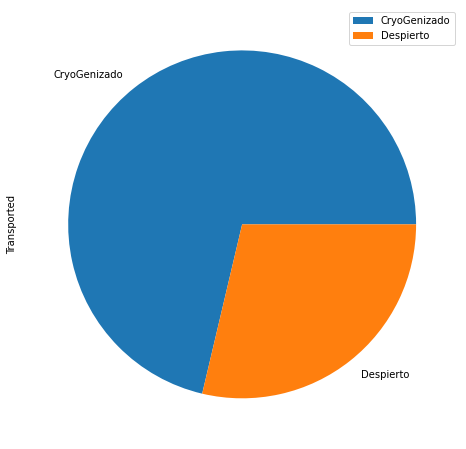

In [99]:
df[['CryoSleep','Transported']].groupby(['CryoSleep'], as_index=False).mean().sort_values('Transported', ascending=False).plot(figsize=(12,8),kind='pie', y='Transported', labels=['CryoGenizado', 'Despierto'])

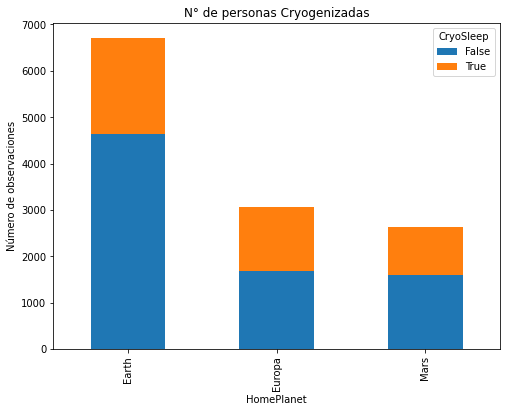

In [100]:
counts=df.groupby('HomePlanet')['CryoSleep'].value_counts()

ax = counts.unstack().plot(kind='bar', stacked=True, figsize=(8, 6))

# Personalizar la leyenda y los títulos del gráfico
ax.set_xlabel('HomePlanet')
ax.set_ylabel('Número de observaciones')
ax.set_title('N° de personas Cryogenizadas')
ax.legend(['False', 'True'], title='CryoSleep')
plt.show()

## Destination
Revisamos el porcentaje de transportados segun el destino. Parece ser una variable influyente

<AxesSubplot:ylabel='Transported'>

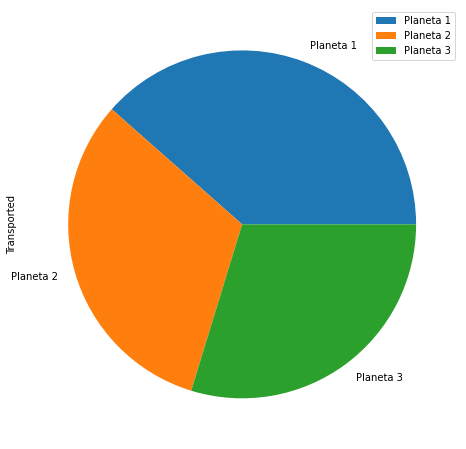

In [101]:
df[['Destination','Transported']].groupby(['Destination'], as_index=False).mean().sort_values('Transported', ascending=False).plot(figsize=(12,8),kind='pie', y='Transported', labels=['Planeta 1', 'Planeta 2', 'Planeta 3'])

## VIP
Es de pensarse que esta variable influya en las personas transportadas. Aunque no influyo como pensariamos

In [102]:
df[['VIP','Transported']].groupby(['VIP'], as_index=False).mean().sort_values('Transported', ascending=False)

,VIP,Transported
0,False,0.506332
1,True,0.381910


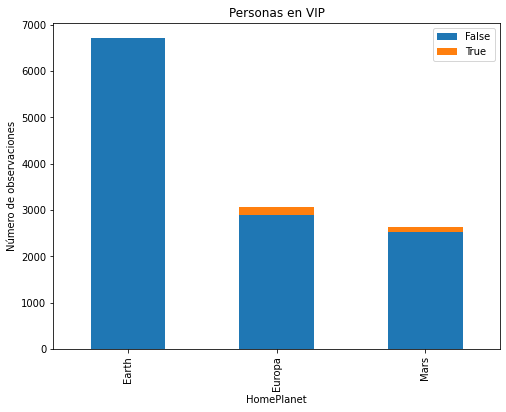

In [103]:
counts=df.groupby('HomePlanet')['VIP'].value_counts()

ax = counts.unstack().plot(kind='bar', stacked=True, figsize=(8, 6))

# Personalizar la leyenda y los títulos del gráfico
ax.set_xlabel('HomePlanet')
ax.set_ylabel('Número de observaciones')
ax.set_title('Personas en VIP')
ax.legend()
plt.show()

### Deck, Side

Se revisa el numero de personas por deck, servira para completar los valores nulos al ver que hay preferencias por el pais en que arribaron.
Tambien se evidencia que el deck es una fuerte decision de si fueron transportados o no.

In [104]:
df[['Deck','Transported']].groupby(['Deck'], as_index=False).mean().sort_values('Transported', ascending=False)

,Deck,Transported
1,B,0.734275
2,C,0.680054
6,G,0.516217
0,A,0.496094
5,F,0.439871
3,D,0.433054
4,E,0.357306
7,T,0.200000


In [105]:
df[['Side','Transported']].groupby(['Side'], as_index=False).mean().sort_values('Transported', ascending=False)

,Side,Transported
1,S,0.555037
0,P,0.451260


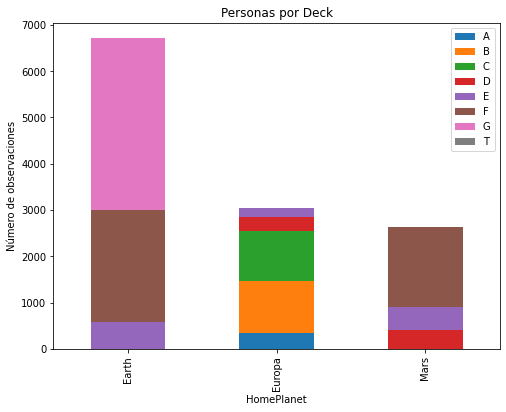

In [106]:
counts=df.groupby('HomePlanet')['Deck'].value_counts()

ax = counts.unstack().plot(kind='bar', stacked=True, figsize=(8, 6))

# Personalizar la leyenda y los títulos del gráfico
ax.set_xlabel('HomePlanet')
ax.set_ylabel('Número de observaciones')
ax.set_title('Personas por Deck')
ax.legend()
plt.show()

### Age
Es de esperarce que la edad afecte a la variable objetivo aunque no parece ser el caso, la curva de transportados y no transportados es casi la misma a diferencia de algunas edades como los niños con 0 años. 

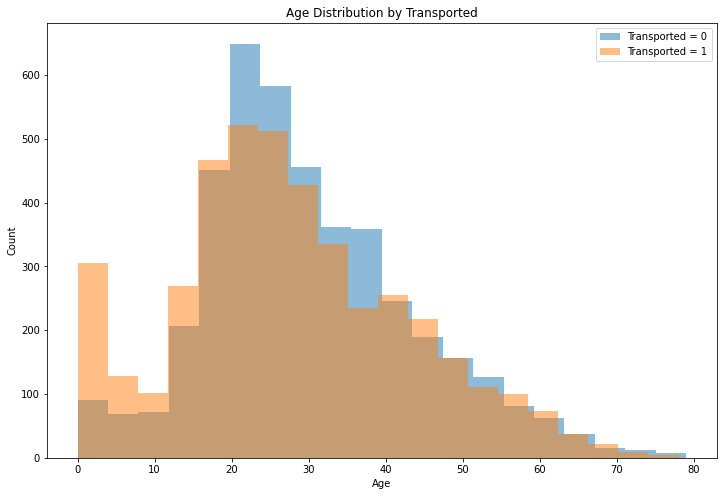

In [107]:
import matplotlib.pyplot as plt

# Crear el histograma para Transported = 0
df[df['Transported'] == 0]['Age'].plot.hist(figsize=(12,8),bins=20, alpha=0.5, label='Transported = 0')

# Crear el histograma para Transported = 1 y superponerlo
df[df['Transported'] == 1]['Age'].plot.hist(figsize=(12,8),bins=20, alpha=0.5, label='Transported = 1')

# Configurar los títulos y etiquetas de los ejes y la leyenda
plt.title('Age Distribution by Transported')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(loc='upper right')

# Mostrar la figura
plt.show()

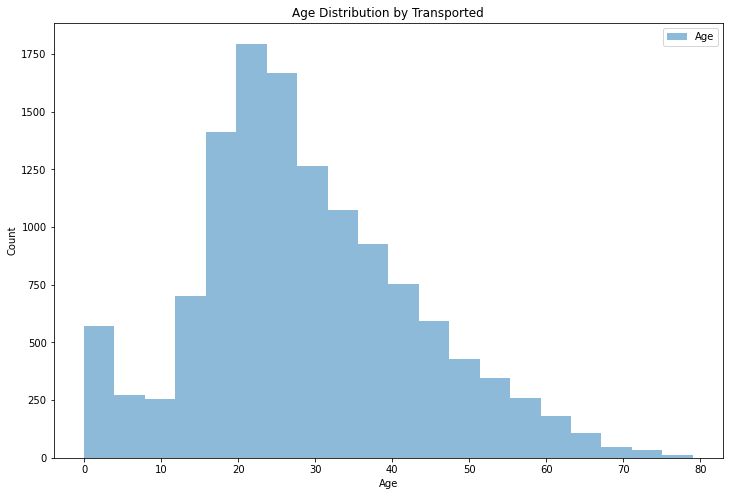

In [108]:
# Crear el histograma para Transported = 0
df['Age'].plot.hist(figsize=(12,8),bins=20, alpha=0.5)

# Configurar los títulos y etiquetas de los ejes y la leyenda
plt.title('Age Distribution by Transported')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(loc='upper right')

# Mostrar la figura
plt.show()

# Completamos valores nulos
Observamos con la libreria de missigno donde se encuentran los valores nulos graficamente.
Tambien eliminaremos columnas que no suman a la toma de desicion como son la de Passenger, Name, Bill.

<AxesSubplot:>

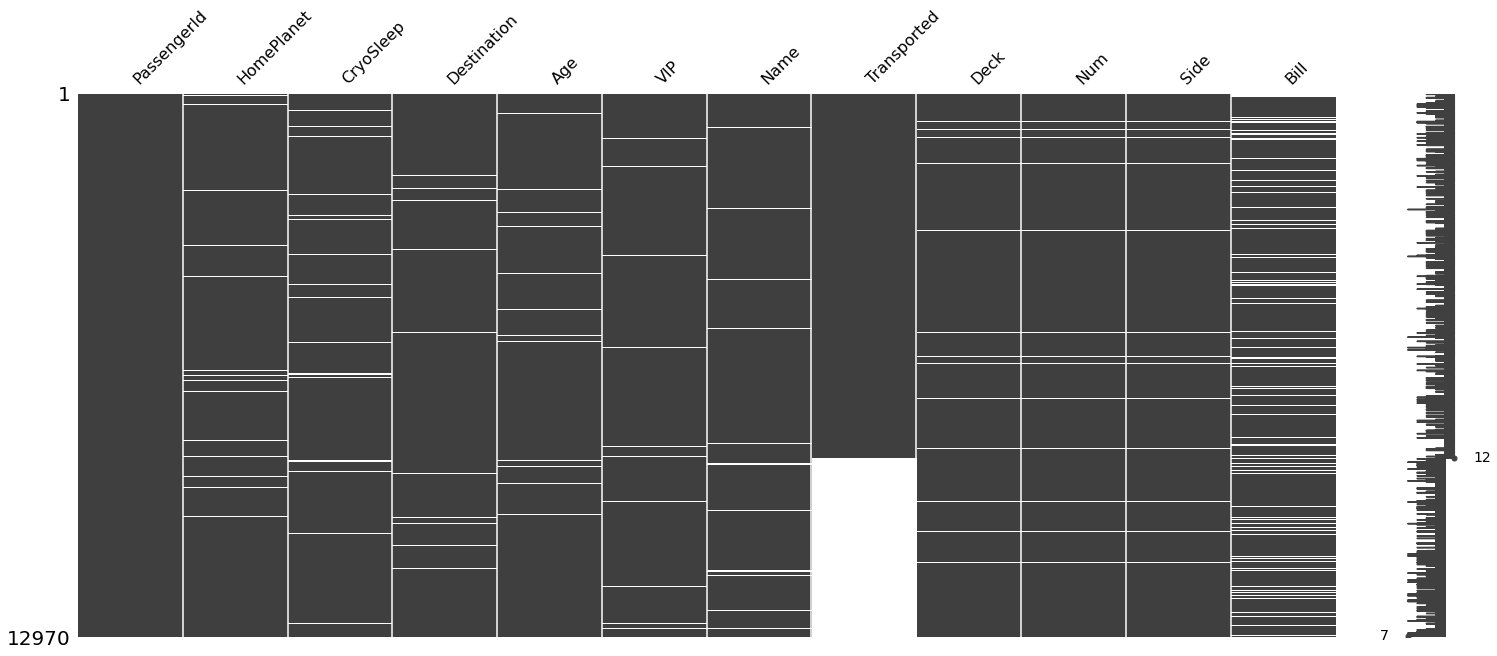

In [109]:
# Visualizar los valores nulos
msno.matrix(df)


## Borramos las columnas sin importancia

In [110]:
lista=['Bill', 'Name', 'PassengerId', 'Age', 'Num']
df[['Group', 'Member']]=df['PassengerId'].str.split('_', expand=True)

df.drop(lista, axis=1, inplace=True)

### HomePlanet

Primero se separan los grupos de la columna Passenger, para luego hallar la moda del planeta de origen por grupo. De esta forma logramos completar datos que no se hayan cargado en los integrantes aliados pero si en los demas. Cuando aun asi no es suficiente para poder responder a las incognitas entonces rellanmos con la moda de todo el dataframe

In [111]:
grupo_planeta = df.groupby('Group')['HomePlanet'].apply(lambda x: x.value_counts(dropna=False).idxmax())

In [112]:
grupo_planeta=pd.DataFrame(grupo_planeta)
grupo_planeta['HomePlanet'].fillna(grupo_planeta['HomePlanet'].mode()[0],inplace=True)

In [113]:
df.drop('HomePlanet',axis=1,inplace=True)
df=pd.merge(df,grupo_planeta, on='Group')


## CryoSleep
Como esta variable tiene gran influencie en los pasajeros que se transportaron o no. Y sus valores nulos solo representan el 2.4% del conjunto de datos es de preferencia eliminarlos del dataset y no suponerlos. Evitando sesgar el modelo. 

In [114]:
print('Cantidad de datos en el set de entrenamiento:',df_train.shape[0],'\n','Cantidad de datos en el set de prueba:', df_test.shape[0])
print('Porcentaje de nulos de la variable CryoSleep en total:',round((df['CryoSleep'].isnull().sum())/(df_train.shape[0]+df_test.shape[0])*100,2),'%')

Cantidad de datos en el set de entrenamiento: 8693 
 Cantidad de datos en el set de prueba: 4277
Porcentaje de nulos de la variable CryoSleep en total: 2.39 %


In [115]:
df.dropna(subset=['CryoSleep'], inplace=True)

## Destination
Completamos con la moda

In [116]:
df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)

## Vip, Deck y Side
VIP completamos con falso dado que es lo mas frecuente, y las variables deck y side completamos con la moda por planeta de arribo. 

In [117]:
df.groupby('HomePlanet')['Deck'].apply(lambda x: x.mode())

HomePlanet   
Earth       0    G
Europa      0    B
Mars        0    F
Name: Deck, dtype: object

In [118]:
df.groupby('HomePlanet')['Side'].apply(lambda x: x.mode())

HomePlanet   
Earth       0    P
Europa      0    S
Mars        0    P
Name: Side, dtype: object

In [119]:
df['Deck'] = df.groupby('HomePlanet')['Deck'].apply(lambda x: x.fillna(x.mode()[0]))
df['Side'] = df.groupby('HomePlanet')['Side'].apply(lambda x: x.fillna(x.mode()[0]))
df['VIP'].fillna(False, inplace=True)

# Muestra Final

<AxesSubplot:>

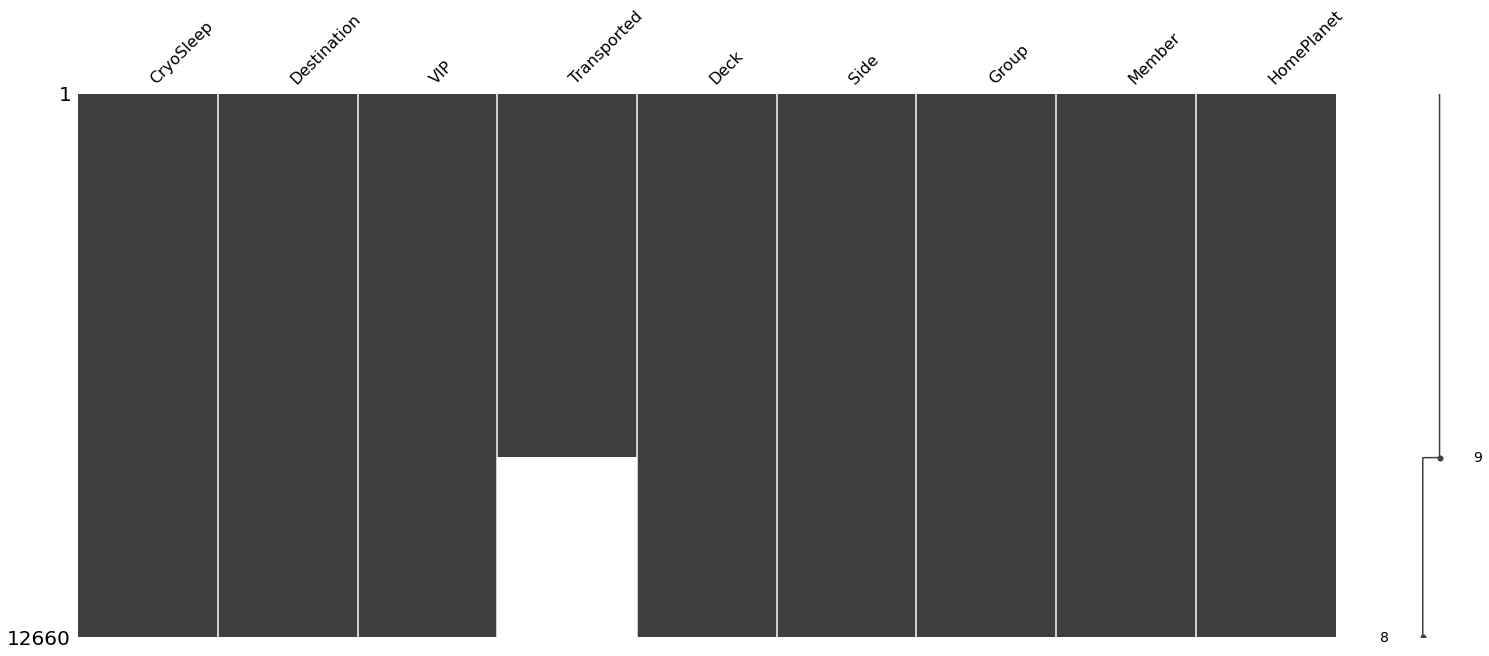

In [120]:
msno.matrix(df)